# Leveraging Synthetic Data

Synthetic data, which is artificially generated to mimic real-world data, plays a crucial role in various aspects of data analysis and project management.
Its benefits are multifaceted:

- **Enhanced Privacy and Security**: Synthetic data is a powerful tool for scenarios involving sensitive or personal information, offering a solution that bypasses privacy and security concerns.
- **Robust Testing and Development**: It serves as a reliable and scalable resource for testing and refining models during the development of new data-driven applications or algorithms.
- **Solving Data Scarcity Issues**: In situations where real data is limited or unavailable, synthetic data enables the continuation of model development and analysis.
- **Exploring Complex Patterns and Anomalies**: Synthetic data is invaluable for simulating diverse scenarios, including rare events, aiding in the understanding of complex patterns and the preparation of strategic responses.

## The Challenge of Acquiring Real-World Data

Obtaining real-world data often represents a significant time investment in a project, affecting subsequent stages. The following diagram illustrates the lifecycle of a data science project from three perspectives, each acknowledging the challenges of practical data acquisition.
Particularly, the "Realistic" project lifecycle perspective underscores the extended duration required for data acquisition, including the request process, [Non-Disclosure Agreements (NDAs)](https://en.wikipedia.org/wiki/Non-disclosure_agreement), and waiting periods, as well as data cleaning, which impacts later stages.

Utilizing synthetic data strategically can accelerate the *Data Science* and *Deployment* phases. This approach enables the development of code and reports based on predefined data characteristics, allowing for a smooth transition to real-world data once it becomes available.


```mermaid
gantt
    dateFormat  YYYY-MM-DD
    title       Data Science Project Lifecycle
    todayMarker off
    
    section Idealized
    Data Cleaning          :         des1, after - ,30d
    Data Science           :         des2, after des1, 60d
    Deployment             :         des3, after des2, 60d

    section Less naive
    Data Cleaning          :         des4, after -, 60d
    Data Science           :         des5, after des4, 30d
    Deployment             :         des6, after des5, 60d

    section Realistic
    Request Data + NDA     :crit, active, des7, after -, 15d
    Waiting for Data       :crit, active, des8, after des7, 15d
    Data Cleaning          :crit, active, des9, after des8, 30d
    Data Science           :crit, active, des10, after des9, 30d
    Deployment             :crit, active, des11, after des10, 60d
```
*Source: [The key stages of a data science project](https://fastdatascience.com/the-key-stages-of-a-data-science-project/)*



## Creating the Synthetic Dataset

Designing a synthetic dataset demands a deep understanding of both the intended use of the synthetic data and the nature of the original data it aims to replicate.

The process of determining realistic features includes:

- Identifying the specific purpose of the data.
- Analyzing data characteristics, such as categories, distributions, correlations, and dependencies.
- Consulting stakeholders.
- Studying similar datasets, past projects, or available data to gain insights and best practices.

## Validating the Synthetic Dataset

After creation, assessing the utility of the synthetic data against its intended use is crucial. This evaluation can include:

- Statistical analyses
- Visual inspection
- Interviews with stakeholders
- Applying the data in processes similar to those used for the original dataset.

Feedback from this phase is essential: The final dataset is developed through multiple refinements, based on iterative adjustments in feature selection.

## Example: New York City Rides Dataset

In the following, a function to generate taxi rides is presented.

In [28]:
import numpy as np  # Used for numerical operations
import pandas as pd  # Used for data manipulation and analysis
from datetime import datetime, timedelta  # Used to work with dates and time spans

def generate_taxi_data(n=1000, 
                       start_date=datetime(2023, 1, 1, 0,0,0), 
                       end_date=datetime(2023, 1, 1, 23,59,59),
                       pickup_zone_range=(1, 265), 
                       dropoff_zone_range=(1, 265),
                       passenger_count_range=(1, 6),
                       fare_amount_per_mile=2.5,
                       tip_amount_usd_range=(0.0, 30.0),
                       driver_id_range=(1000, 9999),
                       service_vendors=['Uber', 'Taxi', 'Lyft'],
                       vehicle_types=['Sedan', 'SUV', 'Minivan', 'Luxury'],
                       payment_types=['Cash', 'Credit Card', 'App Payment'],
                       lat_range=(40.5, 40.9),  # Approximate lat range for NYC
                       lon_range=(-74.1, -73.7),  # Approximate lon range for NYC
                       avg_speed_per_mile=20):  # Average speed in miles per hour
    """
    Generate a synthetic taxi dataset intended for data analysis or machine learning modeling.

    Parameters
    ----------
    n : int, optional
        The number of records to generate.
    start_date : datetime, optional
        The start date for generating pickup times.
    end_date : datetime, optional
        The end date for generating pickup times.
    pickup_zone_range : tuple, optional
        The range of pickup zone IDs.
    dropoff_zone_range : tuple, optional
        The range of dropoff zone IDs.
    passenger_count_range : tuple, optional
        The range for the number of passengers.
    fare_amount_per_mile : float, optional
        The fare amount per mile.
    tip_amount_usd_range : tuple, optional
        The range of tip amounts in USD.
    driver_id_range : tuple, optional
        The range of driver IDs.
    service_vendors : list, optional
        The list of service vendors.
    vehicle_types : list, optional
        The list of vehicle types.
    payment_types : list, optional
        The list of payment types.
    lat_range : tuple, optional
        The range of latitude for pickup and dropoff locations.
    lon_range : tuple, optional
        The range of longitude for pickup and dropoff locations.
    avg_speed_per_mile : int, optional
        The average speed in miles per hour.

    Returns
    -------
    DataFrame
        A pandas DataFrame with the following columns:
        - 'PickupTime': The timestamp for when the ride started.
        - 'PickupZoneID': The ID of the pickup zone.
        - 'DropoffZoneID': The ID of the dropoff zone.
        - 'PickupLatitude': The latitude for the pickup location.
        - 'PickupLongitude': The longitude for the pickup location.
        - 'DropoffLatitude': The latitude for the dropoff location.
        - 'DropoffLongitude': The longitude for the dropoff location.
        - 'PassengerCount': The number of passengers.
        - 'DriverID': The ID of the driver.
        - 'ServiceVendor': The service vendor.
        - 'VehicleType': The type of vehicle.
        - 'PaymentType': The method of payment.
        - 'TipAmountUSD': The tip amount in USD.
        - 'CustomerID': The ID of the customer (NaN for Taxi service).
        - 'DistanceMiles': The distance of the trip in miles.
        - 'FareAmountUSD': The fare amount in USD.
        - 'DropoffTime': The timestamp for when the ride ended.
    """
    def random_datetime(start, end):
        """
        Generate a random datetime between two datetime objects.
        
        Parameters
        ----------
        start : datetime
            The start datetime.
        end : datetime
            The end datetime.
        
        Returns
        -------
        datetime
            A randomly selected datetime between `start` and `end`.
        """
        return start + timedelta(
            seconds=np.random.randint(0, int((end - start).total_seconds())),
        )

    def calculate_distance(lat1, lon1, lat2, lon2):
        """
        Calculate the Manhattan distance between two points.
        
        Parameters
        ----------
        lat1 : float
            Latitude of the first point.
        lon1 : float
            Longitude of the first point.
        lat2 : float
            Latitude of the second point.
        lon2 : float
            Longitude of the second point.
        
        Returns
        -------
        float
            The calculated distance.
        """
        return abs(lat2 - lat1) + abs(lon2 - lon1)

    def calculate_dropoff_time(pickup_time, distance, avg_speed):
        """
        Calculate the dropoff time based on pickup time, distance, and average speed.
        
        Parameters
        ----------
        pickup_time : datetime
            The pickup time.
        distance : float
            The distance of the trip in miles.
        avg_speed : float
            The average speed in miles per hour.
        
        Returns
        -------
        datetime
            The calculated dropoff time.
        """
        trip_duration_hours = distance / avg_speed
        trip_duration = timedelta(hours=trip_duration_hours)
        return pickup_time + trip_duration

    df = pd.DataFrame({
        'PickupTime': [random_datetime(start_date, end_date) for _ in range(n)],
        'PickupZoneID': np.random.randint(*pickup_zone_range, n),
        'DropoffZoneID': np.random.randint(*dropoff_zone_range, n),
        'PickupLatitude': np.random.uniform(*lat_range, n),
        'PickupLongitude': np.random.uniform(*lon_range, n),
        'DropoffLatitude': np.random.uniform(*lat_range, n),
        'DropoffLongitude': np.random.uniform(*lon_range, n),
        'PassengerCount': np.random.randint(*passenger_count_range, n),
        'DriverID': np.random.randint(*driver_id_range, n),
        'ServiceVendor': np.random.choice(service_vendors, n),
        'VehicleType': np.random.choice(vehicle_types, n),
        'PaymentType': np.random.choice(payment_types, n),
        'TipAmountUSD': np.random.uniform(*tip_amount_usd_range, n)
    })

    # If vendor is "Taxi", customer has no ID
    df['CustomerID'] = df.apply(
        lambda row: np.nan if row["ServiceVendor"] == 'Taxi'
        else np.random.randint(10000, 99999), axis=1)
    
    # Calculate distances
    df['DistanceMiles'] = df.apply(
        lambda row: calculate_distance(
            row['PickupLatitude'], row['PickupLongitude'], 
            row['DropoffLatitude'], row['DropoffLongitude']),
        axis=1)

    # Calculate fare amounts
    df['FareAmountUSD'] = df['DistanceMiles'] * fare_amount_per_mile

    # Calculate dropoff times based on distance and average speed
    df.insert(1, 'DropoffTime', df.apply(
        lambda row: calculate_dropoff_time(
            row['PickupTime'], row['DistanceMiles'],
            avg_speed_per_mile),
        axis=1))

    return df

# Example usage of the function
df_rides = generate_taxi_data(n=100)
df_rides.sort_values(by=["PickupTime", "DropoffTime"], inplace=True)
df_rides.head()

,PickupTime,DropoffTime,PickupZoneID,DropoffZoneID,PickupLatitude,PickupLongitude,DropoffLatitude,DropoffLongitude,PassengerCount,DriverID,ServiceVendor,VehicleType,PaymentType,TipAmountUSD,CustomerID,DistanceMiles,FareAmountUSD
13,2023-01-01 00:35:07,2023-01-01 00:36:02.176768,159,79,40.725000,-73.762620,40.646072,-73.990228,1,8095,Taxi,Sedan,Credit Card,24.534950,NaN,0.306538,0.766344
7,2023-01-01 00:53:12,2023-01-01 00:54:41.627233,126,196,40.873430,-74.032506,40.540190,-73.867816,1,2468,Lyft,Luxury,Credit Card,6.252199,49019.0,0.497929,1.244823
33,2023-01-01 01:25:13,2023-01-01 01:26:34.326817,33,197,40.513130,-73.986253,40.852631,-74.098568,4,9783,Taxi,Minivan,Cash,3.580295,NaN,0.451816,1.129539
10,2023-01-01 01:32:21,2023-01-01 01:33:42.155064,131,60,40.888251,-74.054309,40.583908,-73.907790,4,6417,Taxi,SUV,Cash,1.525244,NaN,0.450861,1.127154
42,2023-01-01 01:41:57,2023-01-01 01:42:50.792364,112,180,40.526995,-73.945118,40.693047,-73.812324,2,8828,Taxi,Minivan,App Payment,4.933772,NaN,0.298846,0.747116


<Axes: title={'center': 'Pickup origins'}, xlabel='Longitude', ylabel='Latitude'>

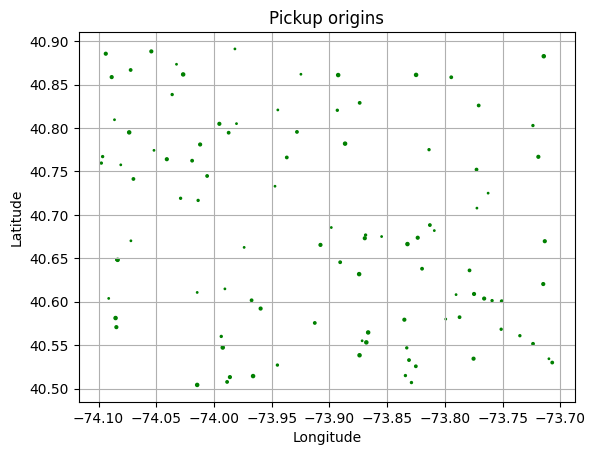

In [29]:
df_rides.plot(
    kind="scatter",
    x="PickupLongitude",
    y="PickupLatitude",
    c="g",
    s="PassengerCount",
    grid=True,
    title='Pickup origins',
    xlabel='Longitude',
    ylabel='Latitude')

In [30]:
df_rides.groupby(by=["ServiceVendor", "VehicleType"]).count()


PickupTime  DropoffTime  PickupZoneID  \
ServiceVendor VehicleType                                          
Lyft          Luxury                6            6             6   
              Minivan               5            5             5   
              SUV                  12           12            12   
              Sedan                 6            6             6   
Taxi          Luxury               12           12            12   
              Minivan               7            7             7   
              SUV                   9            9             9   
              Sedan                11           11            11   
Uber          Luxury                9            9             9   
              Minivan               5            5             5   
              SUV                   8            8             8   
              Sedan                10           10            10   

                           DropoffZoneID  PickupLatitude  PickupLongitude  \
ServiceVendor VehicleType                                                   
Lyft          Luxury                   6               6                6   
              Minivan                  5               5                5   
              SUV                     12              12               12   
              Sedan                    6               6                6   
Taxi          Luxury                  12              12               12   
              Minivan                  7               7                7   
              SUV                      9               9                9   
              Sedan                   11              11               11   
Uber          Luxury                   9               9                9   
              Minivan                  5               5                5   
              SUV                      8               8                8   
              Sedan                   10              10               10   

                           DropoffLatitude  DropoffLongitude  PassengerCount  \
ServiceVendor VehicleType                                                      
Lyft          Luxury                     6                 6               6   
              Minivan                    5                 5               5   
              SUV                       12                12              12   
              Sedan                      6                 6               6   
Taxi          Luxury                    12                12              12   
              Minivan                    7                 7               7   
              SUV                        9                 9               9   
              Sedan                     11                11              11   
Uber          Luxury                     9                 9               9   
              Minivan                    5                 5               5   
              SUV                        8                 8               8   
              Sedan                     10                10              10   

                           DriverID  PaymentType  TipAmountUSD  CustomerID  \
ServiceVendor VehicleType                                                    
Lyft          Luxury              6            6             6           6   
              Minivan             5            5             5           5   
              SUV                12           12            12          12   
              Sedan               6            6             6           6   
Taxi          Luxury             12           12            12           0   
              Minivan             7            7             7           0   
              SUV                 9            9             9           0   
              Sedan              11           11            11           0   
Uber          Luxury              9            9             9           9   
              Mi